# **Taxi Ride Data Analysis**

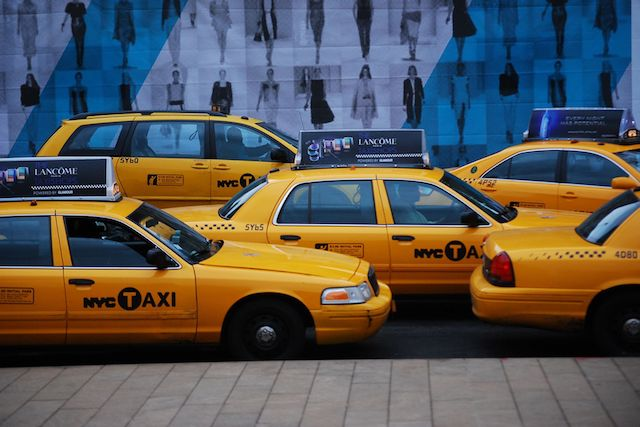


## Define the problem

##### Questions

What is the average trip duration?

What is the longest trip? - sort by trip duration, groupby method
What are the units for trip duration?
How many trips start at each (lat,long) pair?
Can I train the model to predict how long a trip is going to be based on start,end coordinates?
Formula:
distance = sqrt(((dropoff_latitude - pickup_latitude)^2)+((dropoff_longitude - pickup_longitude)^2))

# Preprocessing

Filling, drop NA, normalize data features
Create dummy variables
Additional preprocessing techniques

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import mean_squared_error

In [91]:
df = pd.read_csv('NYC_Cab_Duration.csv')
print(df.shape)
df.head()

(583458, 10)


,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id3879397,1,2016-06-02 17:46:16,1,-73.990105,40.732841,-73.973244,40.782879,N,2170
1,id0701659,1,2016-03-02 10:07:11,1,-73.975693,40.759712,-73.988235,40.753986,N,808
2,id3093367,2,2016-02-17 17:18:27,2,-73.781830,40.644772,-73.989960,40.747150,N,3787
3,id0727316,2,2016-03-17 07:30:59,1,-73.956200,40.778713,-73.976463,40.739731,N,679
4,id2137873,2,2016-04-20 17:15:26,6,-73.789513,40.646938,-73.951851,40.809151,N,2791


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583458 entries, 0 to 583457
Data columns (total 10 columns):
id                    583458 non-null object
vendor_id             583458 non-null int64
pickup_datetime       583458 non-null object
passenger_count       583458 non-null int64
pickup_longitude      583458 non-null float64
pickup_latitude       583458 non-null float64
dropoff_longitude     583458 non-null float64
dropoff_latitude      583458 non-null float64
store_and_fwd_flag    583458 non-null object
trip_duration         583458 non-null int64
dtypes: float64(4), int64(3), object(3)
memory usage: 44.5+ MB


In [94]:
y_feat = 'trip_duration'
x_feats = [feat for feat in df.columns if df[feat].dtype in [np.int64, np.float64] and feat != y_feat]
y = df[y_feat]
X = df[x_feats]

In [49]:
#Drop

#ridership = df.drop(0)
#companies = ridership['vendor_id'].unique()
#len(companies)
#ridership.sort_values('vendor_id')

In [48]:
#ridership.head()

In [ ]:
#Filling

In [ ]:
#Normalize data features

In [95]:
#Dummy Variables

#Change datetime format to day of week
df.vendor_id = df.vendor_id.astype(str) #For creating dummy variable
df['pickup_datetime'] = pd.to_datetime(df.pickup_datetime)
df['Month'] = df.pickup_datetime.dt.month
df['Day_of_Month'] = df.pickup_datetime.dt.day
df['Day_of_Week'] = df.pickup_datetime.dt.dayofweek
df['Hour'] = df.pickup_datetime.dt.hour
df.head(5)

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,Month,Day_of_Month,Day_of_Week,Hour
0,id3879397,1,2016-06-02 17:46:16,1,-73.990105,40.732841,-73.973244,40.782879,N,2170,6,2,3,17
1,id0701659,1,2016-03-02 10:07:11,1,-73.975693,40.759712,-73.988235,40.753986,N,808,3,2,2,10
2,id3093367,2,2016-02-17 17:18:27,2,-73.781830,40.644772,-73.989960,40.747150,N,3787,2,17,2,17
3,id0727316,2,2016-03-17 07:30:59,1,-73.956200,40.778713,-73.976463,40.739731,N,679,3,17,3,7
4,id2137873,2,2016-04-20 17:15:26,6,-73.789513,40.646938,-73.951851,40.809151,N,2791,4,20,2,17


In [96]:
df = df.groupby('Hour')['passenger_count'].mean()
df.head()

Hour
0    1.691731
1    1.705936
2    1.700323
3    1.713081
4    1.701618
Name: passenger_count, dtype: float64

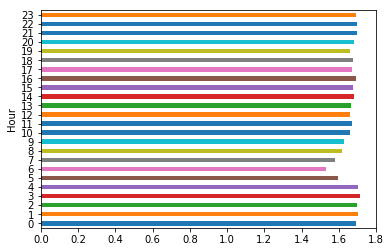

In [74]:
df.plot(kind='barh')

#Test
pd.unique(df[['pickup_latitude','pickup_longitude']].values.ravel())

#Origin, Destination
Origin = ['pickup_latitude ' + 'pickup_longitude']

In [ ]:
#Additional Techniques

# Exploratory Data Analysis

Initial exploration – correlation, multicollinearity
3+ visuals
Create heatmaps
Investigate further relationships/trends in data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a34110cf8>,
      dtype=object)

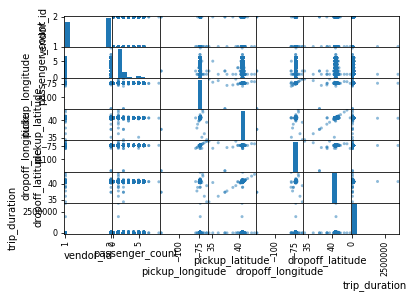

In [111]:
#Scatter Matrix

pd.plotting.scatter_matrix(df)

In [104]:
#trip duration mean
df = pd.read_csv('NYC_Cab_Duration.csv')
df['trip_duration'].mean()

962.2879727418255

### Correlation

In [ ]:
#Correlation Coefficient

grouped[['trip_duration', 'Hour']].corr()

### Multicollinearity

In [3]:
#Multicollinearity

### Visuals

In [110]:
#Visual 1

(
ggplot(plt_df, aes(x='passenger_count', fill='Hour'))
 + geom_histogram(bins=24)
 + theme_minimal()
) 

NameError: name 'ggplot' is not defined

#Visual 2

plt_df = df.assign(Survived = lambda d: d['Survived'].map(bool))
(ggplot(plt_df, aes(x='Sex', fill='Survived'))
 + geom_bar()
 + theme_minimal()
)


#Visual 3

plt_df = df.assign(Survived = lambda d: d['Survived'].map(bool))
(ggplot(plt_df, aes(x='Age', color='Survived'))
 + geom_density()
 + theme_minimal()
)


### Heatmap

In [20]:
from folium import plugins
from folium.plugins import HeatMap

heat_df = df[['pickup_latitude', 'pickup_longitude', 'trip_duration']]


newyork_on_heatmap = folium.Map(location=[40.767937,-73.982155 ],tiles= "Stamen Terrain",
                  zoom_start = 13)

heat_df['Weight'] = heat_df['trip_duration']
heat_df['Weight'] = heat_df['Weight'].astype(float)
heat_df = heat_df.dropna(axis=0, subset=['pickup_latitude','pickup_longitude', 'Weight'])

heat_data = [[[row['pickup_latitude'],row['pickup_longitude']]
              for index, row in heat_df[heat_df['Weight'] == i].iterrows()]
               for i in range(0,6)]

hm = plugins.HeatMapWithTime(heat_data,auto_play=True,max_opacity=0.8)
hm.add_to(newyork_on_heatmap)

newyork_on_heatmap

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [ ]:
#Further Relationships

# Feature Engineering

At least one complex feature, Measure before/after

In [2]:
#Complex Feature
df['lat_diff'] = df.dropoff_latitude - df.pickup_latitude
df['long_diff'] = df.dropoff_longitude -  df.pickup_longitude
df['distance'] = np.sqrt(df.long_diff**2 + df.lat_diff**2)
#Find unique distances, plot vs. trip duration

NameError: name 'df' is not defined

# Regression

Train-test split/Cross validation, Multiple regression techniques, Test effect of several tuning parameters on a single algorithm

### Train-test Split

In [105]:
#Train-test
X_train, X_test, y_train, y_test = train_test_split(X, y)
models = [LinearRegression(), Lasso(), Ridge()]
names = ['OLS', 'Lasso', 'Ridge']
for model, name in list(zip(models, names)):
    model.fit(X_train, y_train)
    y_hat_train = model.predict(X_train)
    y_hat_test = model.predict(X_test) 
    print('Model Stats for: {}'.format(name))
    print('Train R^2:', model.score(X_train, y_train))
    print('Test R^2:', model.score(X_test, y_test))
    print('Training MSE: {}'.format(mean_squared_error(y_train, y_hat_train)))
    print('Testing MSE: {}'.format(mean_squared_error(y_test, y_hat_test)))
    print('\n')

Model Stats for: OLS
Train R^2: 0.004427501610243301
Test R^2: 0.000748103450678328
Training MSE: 10100562.67995896
Testing MSE: 120824312.54534014


Model Stats for: Lasso
Train R^2: 0.004231280840585883
Test R^2: 0.0006085805611130146
Training MSE: 10102553.434209647
Testing MSE: 120841182.9233442


Model Stats for: Ridge
Train R^2: 0.004427496064167813
Test R^2: 0.0007473382112467286
Training MSE: 10100562.736226568
Testing MSE: 120824405.07408945




### Mean Squared Error

train_mse = np.sqrt(mean_squared_error(y_train, y_hat_train))
test_mse = np.sqrt(mean_squared_error(y_test, y_hat_test))
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

### Linear Regression

In [21]:
X = df[['Hour', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude' ]] #Only numeric features work

y = df['trip_duration']

linreg = LinearRegression()

linreg.fit(X, y)

df['trip_duration'] = linreg.predict(X)

# 6) Measure performance
# Here we print the model's R^2 to measure overall performance; the correlation between our model and the data
print('R^2 model score:', linreg.score(X,y), '\n') 

R^2 model score: 0.0013227314727436434 



### Cross Validation

In [106]:
#KFold
from sklearn.model_selection import KFold

X = ['','','','']
kf = KFold(n_splits=6, shuffle=True)

In [107]:
for train_index, test_index in kf.split(df):
    print('train index:', train_index, len(train_index))
    print('test index:', test_index, len(test_index))
    print()

train index: [     0      1      3 ... 583450 583451 583455] 486215
test index: [     2      4      7 ... 583454 583456 583457] 97243

train index: [     0      2      3 ... 583455 583456 583457] 486215
test index: [     1     16     24 ... 583443 583446 583448] 97243

train index: [     0      1      2 ... 583455 583456 583457] 486215
test index: [     8      9     11 ... 583416 583437 583445] 97243

train index: [     0      1      2 ... 583454 583456 583457] 486215
test index: [    13     18     19 ... 583444 583450 583455] 97243

train index: [     1      2      4 ... 583455 583456 583457] 486215
test index: [     0      3      6 ... 583431 583436 583442] 97243

train index: [     0      1      2 ... 583455 583456 583457] 486215
test index: [     5     10     12 ... 583434 583439 583451] 97243



In [108]:
rmse_df = pd.DataFrame(columns=['fold', 'train', 'test'])

for fold, (train_index, test_index) in enumerate(kf.split(df)):
    X_tr = df.loc[train_index, X_feats]
    y_tr = df.loc[train_index, y_feat]
    X_te = df.loc[test_index, X_feats]
    y_te = df.loc[test_index, y_feat]
#     Similar: X_tr, y_tr, X_te, y_te = train_test_split(......)
    
#     print(X_tr.shape, y_tr.shape)
#     print(X_te.shape, y_te.shape)
#     print()
    

    mod = LinearRegression()
    mod.fit(X_tr, y_tr)
    
    rmse_tr = np.sqrt(mean_squared_error(y_tr, mod.predict(X_tr)))
    rmse_te = np.sqrt(mean_squared_error(y_te, mod.predict(X_te)))
    
    tmp_df = pd.DataFrame({'fold': [fold], 'train': [rmse_tr], 'test': [rmse_te]})
    rmse_df = pd.concat([rmse_df, tmp_df], ignore_index=True)

NameError: name 'X_feats' is not defined

In [ ]:
from plotnine import *

In [109]:
plt_df = (rmse_df.melt(id_vars=['fold'], var_name='data', value_name='rmse')
          .assign(mean = lambda d: d.groupby('data')['rmse'].transform(lambda x: x.mean()))
         )
(ggplot(plt_df, aes(x='fold', y='rmse', fill='data'))
 + geom_col(position='dodge')
 + geom_hline(aes(yintercept='mean', color='data'), linetype='--', size=2)
 + theme_minimal()
)

ValueError: No objects to concatenate

In [ ]:
#Regression 1

In [ ]:
#Regression 2

In [ ]:
#Tuning Parameters

# Discussion